In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
sns.set()
sns.set_context("notebook", rc={"xtick.labelsize":14, "ytick.labelsize":14, "axes.titlesize":20, 
                                "axes.labelsize":16})
import time

localityFeatures = pd.read_csv('../csv/localityFeatures500.csv', index_col=0)
df = pd.read_csv('../csv/NOW_dataframe_cleaned.csv', index_col=0)
speciesFirstOccurrence = pd.read_csv('../csv/speciesFirstOccurrence.csv', index_col=0)
speciesLastOccurrence = pd.read_csv('../csv/speciesLastOccurrence.csv', index_col=0)
timeUnits = ['old','MN1','MN2','MN3','MN4','MN5','MN6','MN7-8','MN9','MN10','MN11','MN12','MN13','MN14','MN15','MN16','MN17','MQ18','MQ19','recent']

pd.set_option('max_columns',100)

In [2]:
# Logistic regression curve

def sigmoid(c,x):
    return 1/(1 + np.exp(-(c[0]+c[1]*x)))
def sigmoid2(c,x):
    return 1/(1 + np.exp(-(c[0]+c[1]*x[0]+c[2]*x[1])))

In [3]:
# import grid data

gridFeaturesAll = []
for timeUnit in timeUnits[1:19]:
    filename = '../csv/gridFeatures500/gridFeatures_' + timeUnit + '.csv'
    gridFeatures = pd.read_csv(filename, index_col=0)
    gridFeaturesAll.append(gridFeatures)

# SPECIATION VS NPP

In [4]:
count=2
for gridFeatures in gridFeaturesAll[1:-1]:
    gridFeatures['TIMEUNIT'] = timeUnits[count]
    
    gridFeatures.loc[gridFeatures['SIGNIFICANCE FIRST']<0.05,'p<0.05'] = 'yes'
    gridFeatures.loc[gridFeatures['SIGNIFICANCE FIRST']>=0.05,'p<0.05'] = 'no'
    
    count += 1

In [5]:
min_occurrences = 2

gridFeaturesPlotting = pd.DataFrame(columns=gridFeaturesAll[1].columns)
for gridFeatures in gridFeaturesAll[1:-1]:
    gridFeaturesPlotting = gridFeaturesPlotting.append(\
                       gridFeatures.loc[(gridFeatures.loc[:,'HYP1':'HYP3'].sum(axis=1)>min_occurrences) | \
                        (gridFeatures.loc[:,'LOP0':'LOP2'].sum(axis=1)>min_occurrences)].copy(), ignore_index=True)

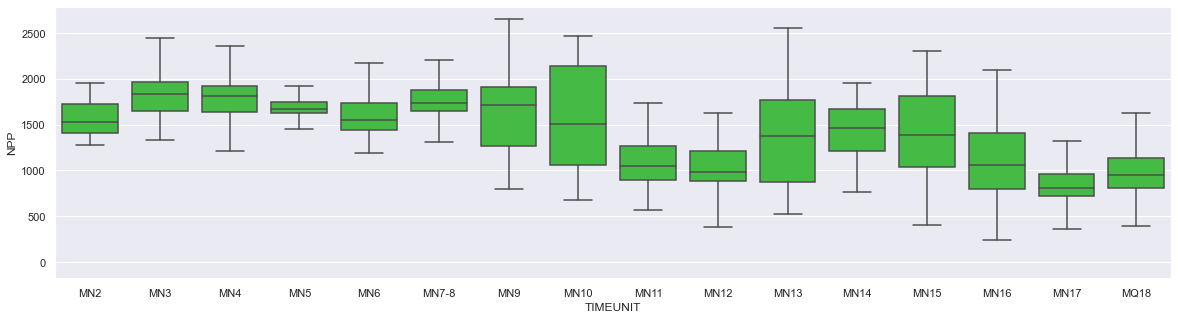

In [6]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x='TIMEUNIT', y='NPP', data=gridFeaturesPlotting, order=timeUnits[2:18], fliersize=0, color='limegreen')
#filepath = '../figures/npp500_boxplot.eps'
#plt.savefig(filepath, bbox_inches='tight')
plt.show()

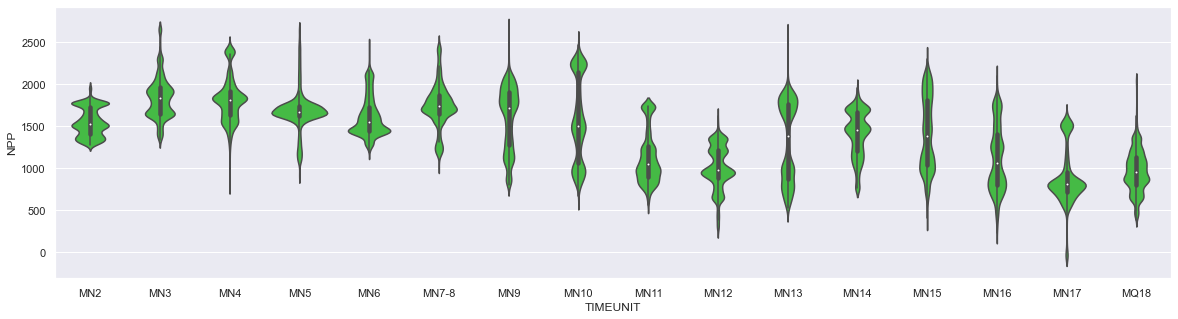

In [7]:
fig, ax = plt.subplots(figsize=(20,5))
sns.violinplot(x='TIMEUNIT', y='NPP', data=gridFeaturesPlotting, order=timeUnits[2:18], fliersize=0, color='limegreen')
#filepath = '../figures/npp500_boxplot.eps'
#plt.savefig(filepath, bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


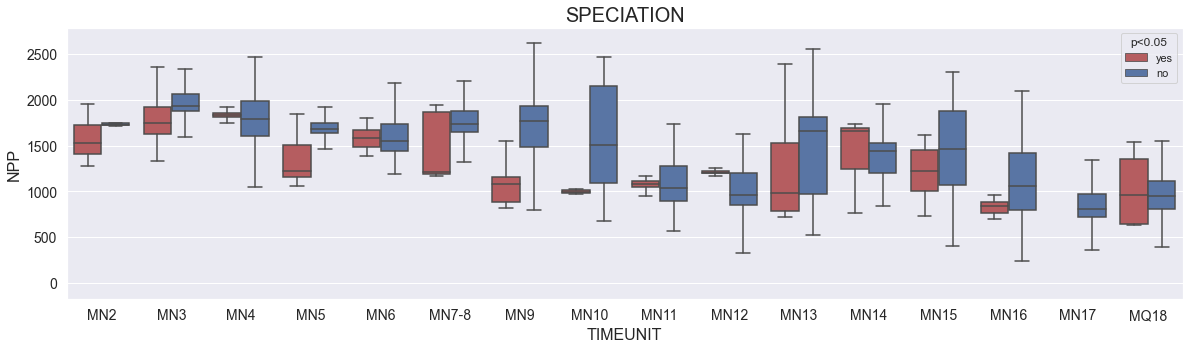

In [40]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.boxplot(x='TIMEUNIT', y='NPP', hue='p<0.05', hue_order=['yes','no'], data=gridFeaturesPlotting, 
            order=timeUnits[2:18], dodge=True, fliersize=0, palette=my_pal).set_title('SPECIATION')
#filepath = '../figures/speciation_boxplot.eps'
#plt.savefig(filepath, bbox_inches='tight')
plt.show()

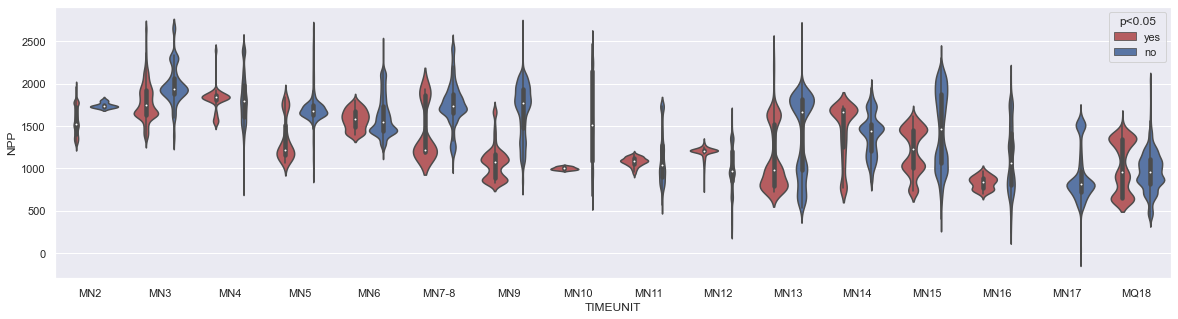

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.violinplot(x='TIMEUNIT', y='NPP', hue='p<0.05', data=gridFeaturesPlotting, order=timeUnits[2:18],\
            dodge=True, palette=my_pal, scale_hue=True)
plt.show()

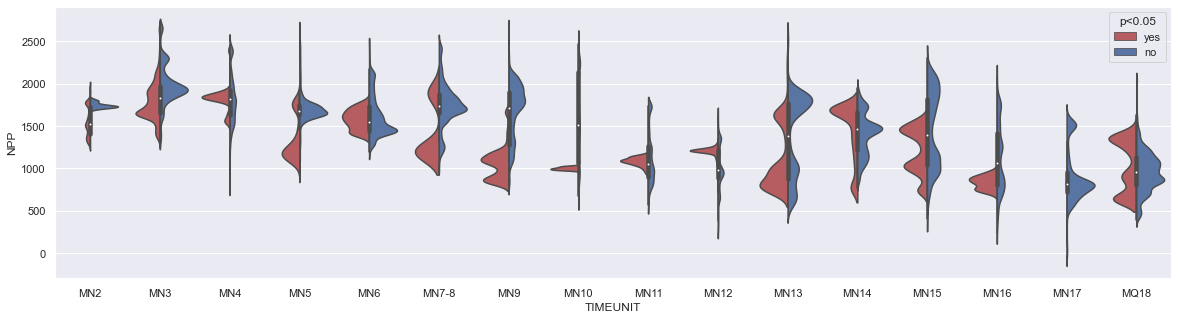

In [10]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.violinplot(x='TIMEUNIT', y='NPP', hue='p<0.05', data=gridFeaturesPlotting, order=timeUnits[2:18],\
            dodge=True, split=True, palette=my_pal)
plt.show()

# EXTINCTION VS NPP

In [41]:
count=2
for gridFeatures in gridFeaturesAll[1:-1]:
    gridFeatures['TIMEUNIT'] = timeUnits[count]        
    gridFeatures.loc[gridFeatures['SIGNIFICANCE LAST']<0.05,'p<0.05'] = 'yes'
    gridFeatures.loc[gridFeatures['SIGNIFICANCE LAST']>=0.05,'p<0.05'] = 'no'    
    count += 1

min_occurrences = 2
gridFeaturesPlotting = pd.DataFrame(columns=gridFeaturesAll[1].columns)
for gridFeatures in gridFeaturesAll[1:-1]:
    gridFeaturesPlotting = gridFeaturesPlotting.append(\
                       gridFeatures.loc[(gridFeatures.loc[:,'HYP1':'HYP3'].sum(axis=1)>min_occurrences) | \
                        (gridFeatures.loc[:,'LOP0':'LOP2'].sum(axis=1)>min_occurrences)].copy(), ignore_index=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


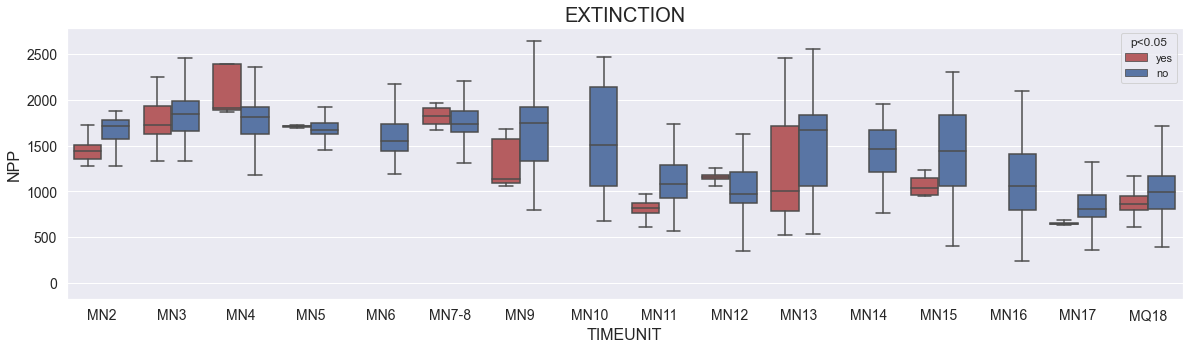

In [43]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.boxplot(x='TIMEUNIT', y='NPP', hue='p<0.05', hue_order=['yes','no'], data=gridFeaturesPlotting, 
            order=timeUnits[2:18], dodge=True, fliersize=0, palette=my_pal).set_title('EXTINCTION')
#filepath = '../figures/extinction_boxplot.eps'
#plt.savefig(filepath, bbox_inches='tight')
plt.show()

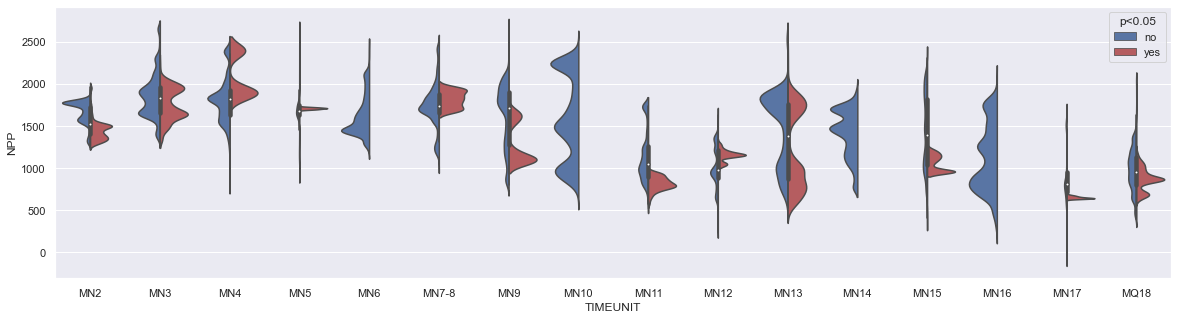

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.violinplot(x='TIMEUNIT', y='NPP', hue='p<0.05', data=gridFeaturesPlotting, order=timeUnits[2:18],\
            dodge=True, split=True, palette=my_pal)
plt.show()

# EMIGRATION VS NPP

In [44]:
count=2
for gridFeatures in gridFeaturesAll[1:-1]:
    gridFeatures['TIMEUNIT'] = timeUnits[count]
    gridFeatures.loc[gridFeatures['SIGNIFICANCE EMIGRATION']<0.05,'p<0.05'] = 'yes'
    gridFeatures.loc[gridFeatures['SIGNIFICANCE EMIGRATION']>=0.05,'p<0.05'] = 'no'
    
    count += 1

In [45]:
min_occurrences = 2

gridFeaturesPlotting = pd.DataFrame(columns=gridFeaturesAll[1].columns)
for gridFeatures in gridFeaturesAll[1:-1]:
    gridFeaturesPlotting = gridFeaturesPlotting.append(\
                       gridFeatures.loc[(gridFeatures.loc[:,'HYP1':'HYP3'].sum(axis=1)>min_occurrences) | \
                        (gridFeatures.loc[:,'LOP0':'LOP2'].sum(axis=1)>min_occurrences)].copy(), ignore_index=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


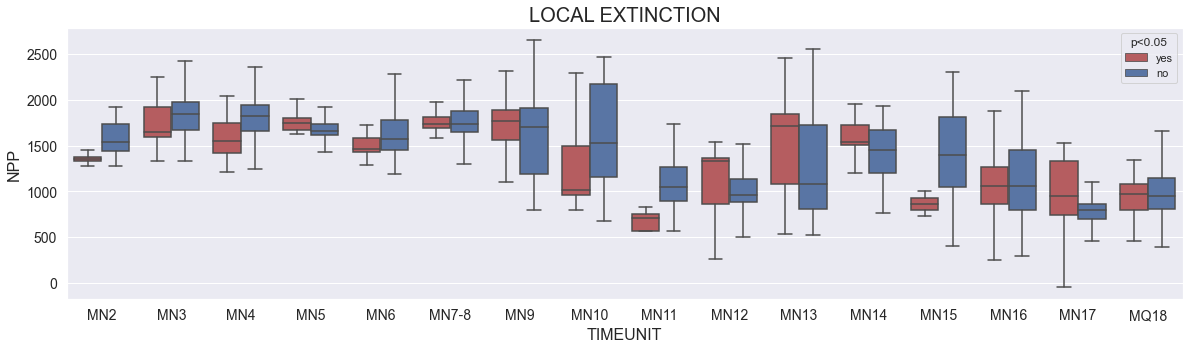

In [47]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.boxplot(x='TIMEUNIT', y='NPP', hue='p<0.05', hue_order=['yes','no'], data=gridFeaturesPlotting, 
            order=timeUnits[2:18], dodge=True, fliersize=0, palette=my_pal).set_title('LOCAL EXTINCTION')
#filepath = '../figures/emigration_boxplot.eps'
#plt.savefig(filepath, bbox_inches='tight')
plt.show()

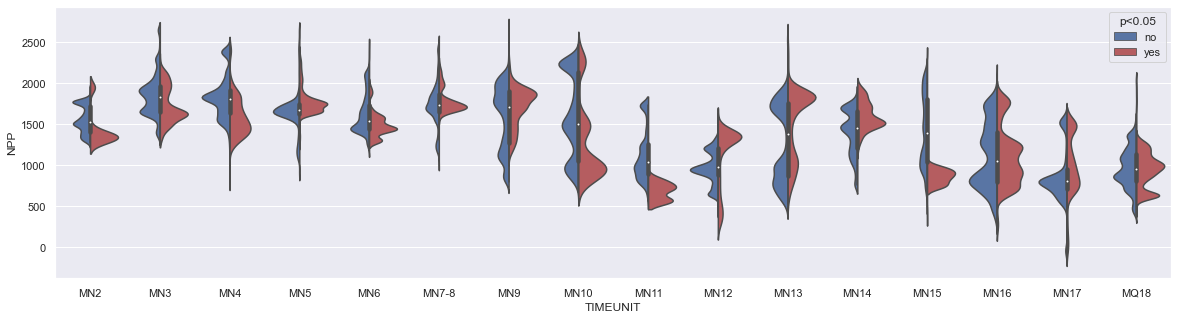

In [17]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.violinplot(x='TIMEUNIT', y='NPP', hue='p<0.05', data=gridFeaturesPlotting, order=timeUnits[2:18],\
            dodge=True, split=True, fliersize=0, palette=my_pal)
plt.show()

# IMMIGRATION VS NPP

In [48]:
count=2
for gridFeatures in gridFeaturesAll[1:-1]:
    gridFeatures['TIMEUNIT'] = timeUnits[count]
    gridFeatures.loc[gridFeatures['SIGNIFICANCE IMMIGRATION']<0.05,'p<0.05'] = 'yes'
    gridFeatures.loc[gridFeatures['SIGNIFICANCE IMMIGRATION']>=0.05,'p<0.05'] = 'no'
    
    count += 1

In [49]:
min_occurrences = 2

gridFeaturesPlotting = pd.DataFrame(columns=gridFeaturesAll[1].columns)
for gridFeatures in gridFeaturesAll[1:-1]:
    gridFeaturesPlotting = gridFeaturesPlotting.append(\
                       gridFeatures.loc[(gridFeatures.loc[:,'HYP1':'HYP3'].sum(axis=1)>min_occurrences) | \
                        (gridFeatures.loc[:,'LOP0':'LOP2'].sum(axis=1)>min_occurrences)].copy(), ignore_index=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


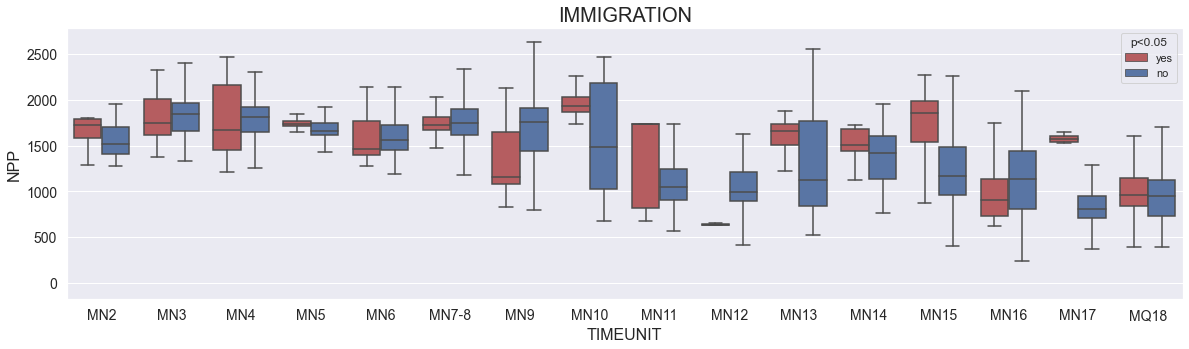

In [51]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.boxplot(x='TIMEUNIT', y='NPP', hue='p<0.05', hue_order=['yes','no'], data=gridFeaturesPlotting,
            order=timeUnits[2:18], dodge=True, fliersize=0, palette=my_pal).set_title('IMMIGRATION')
#filepath = '../figures/immigration_boxplot.eps'
#plt.savefig(filepath, bbox_inches='tight')
plt.show()

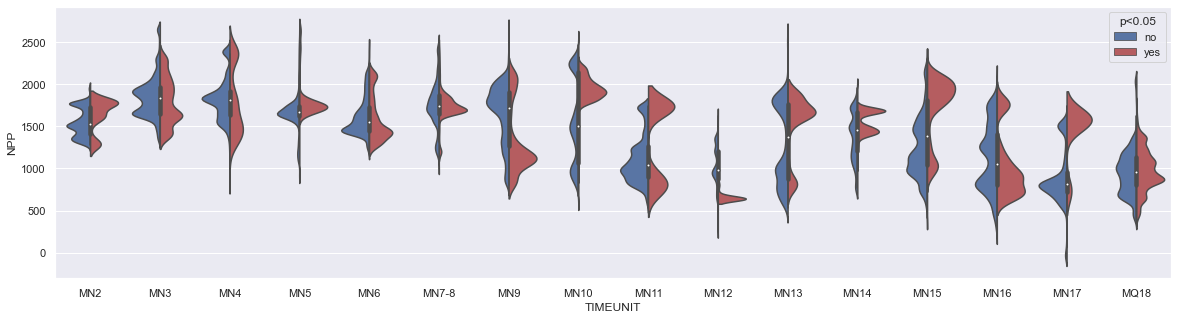

In [21]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.violinplot(x='TIMEUNIT', y='NPP', hue='p<0.05', data=gridFeaturesPlotting, order=timeUnits[2:18],\
            dodge=True, split=True, fliersize=0, palette=my_pal)
plt.show()

# HOTSPOTS

In [22]:
timeBoundaries = [23,21.7,19.5,17.2,16.4,14.2,12.85,11.2,9.9,8.9,7.6,7.1,5.3,5,3.55,2.5,1.9,0.85,0.01,0]

In [10]:
# # only including species that were "born" in or after MN1 within the study area
# allowed_species = []
# for timeUnit in timeUnits[1:-1]:
#     all_species = speciesFirstOccurrence.loc[speciesFirstOccurrence[timeUnit]==1].index
#     for species in all_species:
#         occurrences = df[(df['ID']==species) & (df['TIMEUNIT']==timeUnit)]
#         if ( occurrences.loc[(occurrences['LAT']>35) & (occurrences['LONG']>-25) \
#                            & (occurrences['LONG']<40)].shape[0] ) > 0:
#             allowed_species.append(species)

In [23]:
# only including species that were "born" in or after MN2 and "died" in or before MQ18 within the study area
allowed_species_1 = []
for timeUnit in timeUnits[2:-2]:
    all_species = speciesFirstOccurrence.loc[speciesFirstOccurrence[timeUnit]==1].index
    for species in all_species:
        occurrences = df[(df['ID']==species) & (df['TIMEUNIT']==timeUnit)]
        if ( occurrences.loc[(occurrences['LAT']>35) & (occurrences['LONG']>-25) \
                           & (occurrences['LONG']<40)].shape[0] ) > 0:
            allowed_species_1.append(species)
            
allowed_species_2 = []
for timeUnit in timeUnits[2:-2]:
    all_species = speciesLastOccurrence.loc[speciesLastOccurrence[timeUnit]==1].index
    for species in all_species:
        occurrences = df[(df['ID']==species) & (df['TIMEUNIT']==timeUnit)]
        if ( occurrences.loc[(occurrences['LAT']>35) & (occurrences['LONG']>-25) \
                           & (occurrences['LONG']<40)].shape[0] ) > 0:
            allowed_species_2.append(species)
            
allowed_species = [x for x in allowed_species_1 if x in allowed_species_2] 

In [24]:
len(allowed_species)

2156

In [25]:
# use hull.volume (not hull.area = perimeter length) to get area of 2D convex hull
points = np.array([[0,0], [1,0], [1,1], [0,1]])
hull = ConvexHull(points)
print(hull.area)
print(hull.volume)

4.0
1.0


In [26]:
speciesLifespan = pd.DataFrame(index=allowed_species,columns=['GENUS','SPECIES','LIFESPAN (time units)',\
                                                              'LIFESPAN (My)'])
#speciesRangeHull = pd.DataFrame(index=allowed_species,columns=timeUnits[1:19])
#speciesRangeBox = pd.DataFrame(index=allowed_species,columns=timeUnits[1:19])
speciesRangeHull = pd.DataFrame(index=allowed_species,columns=timeUnits[2:18])
speciesRangeBox = pd.DataFrame(index=allowed_species,columns=timeUnits[2:18])

tic = time.process_time()
for species in speciesLifespan.index:
    timeUnitFirst = timeUnits.index(speciesFirstOccurrence.loc[species].idxmax())
    timeUnitLast = timeUnits.index(speciesLastOccurrence.loc[species].idxmax())    
    speciesLifespan.loc[species,'GENUS'] = df.loc[df['ID']==species,'GENUS'].unique()[0]
    speciesLifespan.loc[species,'SPECIES'] = df.loc[df['ID']==species,'SPECIES'].unique()[0]
    speciesLifespan.loc[species,'LIFESPAN (time units)'] = timeUnitLast - timeUnitFirst + 1
    speciesLifespan.loc[species,'LIFESPAN (My)'] = timeBoundaries[timeUnitFirst-1] - timeBoundaries[timeUnitLast]
    for timeUnit in timeUnits[timeUnitFirst:timeUnitLast+1]:
        occurrences = df[(df['TIMEUNIT']==timeUnit) & (df['ID']==species)]        
        
        # simple "box" area using extreme coordinates
        max_west = occurrences['LONG'].min()
        max_east = occurrences['LONG'].max()
        max_north = occurrences['LAT'].max()
        max_south = occurrences['LAT'].min()
        area = (max_east-max_west) * (max_north-max_south)
        speciesRangeBox.loc[species,timeUnit] = area
        
        # area by convex hull (calculate where possible)
        points = occurrences[['LONG','LAT']]
        try:            
            hull = ConvexHull(points)
            speciesRangeHull.loc[species,timeUnit] = hull.volume
        except:
            # not enough (3) unique occurrences (points really close by may not allow convex hull to be calculated)
            if points.shape[0]>0:
                speciesRangeHull.loc[species,timeUnit] = 0
            # no occurrences
            else:
                speciesRangeHull.loc[species,timeUnit] = np.nan

toc = time.process_time()
print('Time elapsed: ' + str((toc-tic)/60) + ' minutes.')         
display(speciesLifespan.head())
display(speciesRangeHull.head(10))
display(speciesRangeBox.head(10))

Time elapsed: 0.33591966666666667 minutes.


,GENUS,SPECIES,LIFESPAN (time units),LIFESPAN (My)
17,Heteroxerus,rubricati,7,11.8
39,Microdyromys,koenigswaldi,7,11.8
86,Pseudodryomys,ibericus,5,8.85
104,Styriofelis,turnauensis,8,12.8
109,Lagopsis,penai,5,8.85


,MN2,MN3,MN4,MN5,MN6,MN7-8,MN9,MN10,MN11,MN12,MN13,MN14,MN15,MN16,MN17,MQ18
17,0.534763,10.659084,42.794135,35.568959,8.312057,0.075738,0.001926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,1.135818,13.134714,54.405333,56.612781,16.067056,60.452698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,7.625755,34.638726,69.94005,24.323248,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,0,49.650932,48.298479,166.538301,NaN,3.09187,1.078547,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,0,10.585401,72.873711,77.55739,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,0,65.487064,103.677918,4.227306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,2.527882,34.815051,77.47259,24.634404,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,7.65783,45.660145,36.523094,2.631817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,0,1.931159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,0.022493,17.597954,1.176127,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,MN2,MN3,MN4,MN5,MN6,MN7-8,MN9,MN10,MN11,MN12,MN13,MN14,MN15,MN16,MN17,MQ18
17,4.228568,52.446949,187.875698,144.764737,23.305983,14.303512,0.003335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,16.199743,139.369037,173.087437,325.182096,88.871705,158.354193,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,23.092334,156.079894,252.866716,131.917139,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,0.0,99.008376,99.074399,1046.243077,NaN,70.14,18.712803,107.3076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,0.0,50.538321,187.875698,198.200258,18.2501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,23.611365,141.976376,278.772731,9.212937,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,3.537977,196.556294,208.745599,126.903504,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,23.932324,270.338681,138.910002,6.45793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,0.0,4.206535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,22.536978,60.266949,5.061143,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
print('Average species lifespan: ' + str(speciesLifespan['LIFESPAN (time units)'].mean()) + ' time units.')
print('Average species lifespan: ' + str(speciesLifespan['LIFESPAN (My)'].mean()) + ' million years.')
print()
print('Average species lifespan (without singletons): ' + str(speciesLifespan.loc[\
                  speciesLifespan['LIFESPAN (time units)']>1, 'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average species lifespan (without singletons): ' + str(speciesLifespan.loc[\
                  speciesLifespan['LIFESPAN (time units)']>1, 'LIFESPAN (My)'].mean()) + ' million years.')

Average species lifespan: 2.222170686456401 time units.
Average species lifespan: 2.9577226345083956 million years.

Average species lifespan (without singletons): 3.4976303317535544 time units.
Average species lifespan (without singletons): 4.570947867298569 million years.


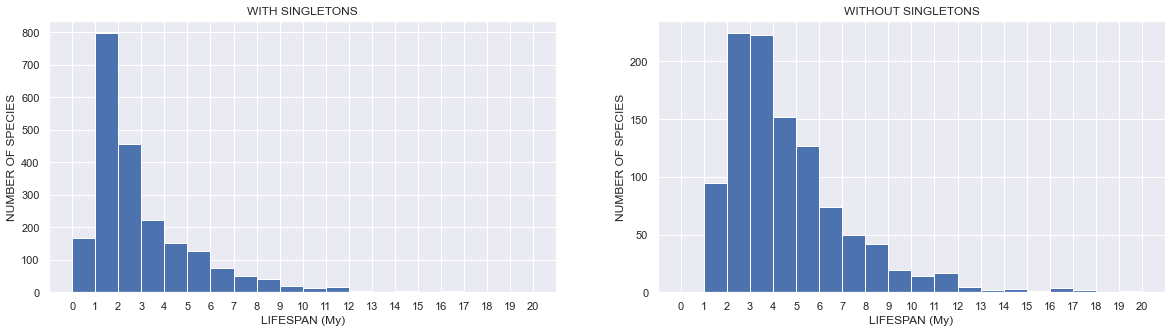

In [28]:
x = np.linspace(0,20,21)
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].hist(speciesLifespan['LIFESPAN (My)'], bins=x)
ax[0].set_xlabel('LIFESPAN (My)')
ax[0].set_ylabel('NUMBER OF SPECIES')
ax[0].set_title('WITH SINGLETONS')
ax[0].set_xticks(x)
ax[1].hist(speciesLifespan.loc[speciesLifespan['LIFESPAN (time units)']>1, 'LIFESPAN (My)'], bins=x)
ax[1].set_xlabel('LIFESPAN (My)')
ax[1].set_ylabel('NUMBER OF SPECIES')
ax[1].set_title('WITHOUT SINGLETONS')
ax[1].set_xticks(x)
plt.show()

In [29]:
# ADD INFO FOR EACH SPECIES ON THEIR OCCURRENCES IN HOTSPOTS
#for timeUnit in timeUnits[1:-1]:
for timeUnit in timeUnits[2:-2]:
    # determine hotspots and hot spot species
    hotspots = localityFeatures[(localityFeatures['TIMEUNIT']==timeUnit) & \
                                (localityFeatures['SIGNIFICANCE FIRST']<0.05)]
    hotspot_species = set(df.loc[df['LIDNUM'].isin(hotspots.index),'ID'].unique())
    hotspot_species = hotspot_species.intersection(allowed_species)
    biodiversity_hotspots = localityFeatures[(localityFeatures['TIMEUNIT']==timeUnit) & \
                     (localityFeatures['SIGNIFICANCE FIRST']<0.05) & (localityFeatures['SIGNIFICANCE LAST']>0.95)]
    biodiversity_hotspot_species = set(df.loc[df['LIDNUM'].isin(biodiversity_hotspots.index),'ID'].unique())
    biodiversity_hotspot_species = biodiversity_hotspot_species.intersection(allowed_species)
    
    # determine info on first occurrences
    first_occurring_species = speciesFirstOccurrence.loc[speciesFirstOccurrence[timeUnit]==1].index
    species_with_first_occurrence_in_hotspot = hotspot_species.intersection(first_occurring_species)
    species_with_first_occurrence_in_biodiversity_hotspot = \
                biodiversity_hotspot_species.intersection(first_occurring_species)
    
    # import info to speciesLifespan dataframe
    speciesLifespan.loc[species_with_first_occurrence_in_hotspot,'FIRST OCCURRENCE IN HOTSPOT'] = 'yes'
    speciesLifespan.loc[hotspot_species,'ANY OCCURRENCE IN HOTSPOT'] = 'yes'        
    
    speciesLifespan.loc[species_with_first_occurrence_in_biodiversity_hotspot,\
                        'FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT'] = 'yes'    
    speciesLifespan.loc[biodiversity_hotspot_species,'ANY OCCURRENCE IN BIODIVERSITY HOTSPOT'] = 'yes'

speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT'].isnull(), 'FIRST OCCURRENCE IN HOTSPOT'] = 'no'
speciesLifespan.loc[speciesLifespan['ANY OCCURRENCE IN HOTSPOT'].isnull(), 'ANY OCCURRENCE IN HOTSPOT'] = 'no'
speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT'].isnull(), \
                    'FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT'] = 'no'
speciesLifespan.loc[speciesLifespan['ANY OCCURRENCE IN BIODIVERSITY HOTSPOT'].isnull(), \
                    'ANY OCCURRENCE IN BIODIVERSITY HOTSPOT'] = 'no'

speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no') & \
                    (speciesLifespan['ANY OCCURRENCE IN HOTSPOT']=='yes'), 'OLD OCCURRENCE (ONLY) IN HOTSPOT'] = 'yes'
speciesLifespan.loc[speciesLifespan['OLD OCCURRENCE (ONLY) IN HOTSPOT'].isnull(), \
                    'OLD OCCURRENCE (ONLY) IN HOTSPOT'] = 'no'
speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='no') & \
                    (speciesLifespan['ANY OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes'), \
                    'OLD OCCURRENCE (ONLY) IN BIODIVERSITY HOTSPOT'] = 'yes'
speciesLifespan.loc[speciesLifespan['OLD OCCURRENCE (ONLY) IN BIODIVERSITY HOTSPOT'].isnull(), \
                    'OLD OCCURRENCE (ONLY) IN BIODIVERSITY HOTSPOT'] = 'no'

speciesLifespan.head()

,GENUS,SPECIES,LIFESPAN (time units),LIFESPAN (My),FIRST OCCURRENCE IN HOTSPOT,ANY OCCURRENCE IN HOTSPOT,FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT,ANY OCCURRENCE IN BIODIVERSITY HOTSPOT,OLD OCCURRENCE (ONLY) IN HOTSPOT,OLD OCCURRENCE (ONLY) IN BIODIVERSITY HOTSPOT
17,Heteroxerus,rubricati,7,11.8,yes,yes,no,yes,no,yes
39,Microdyromys,koenigswaldi,7,11.8,yes,yes,no,yes,no,yes
86,Pseudodryomys,ibericus,5,8.85,yes,yes,no,yes,no,yes
104,Styriofelis,turnauensis,8,12.8,yes,yes,no,yes,no,yes
109,Lagopsis,penai,5,8.85,yes,yes,no,yes,no,yes


## FIRST OCCURRENCES

In [30]:
print('Average lifespan of species that do not have a first occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no',\
        'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average lifespan of species that have a first occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes',\
        'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average lifespan of species that have a first occurrence in a biodiversity hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes',\
        'LIFESPAN (time units)'].mean()) + ' time units.')
print()

print('Average lifespan of species that do not have a first occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no',\
        'LIFESPAN (My)'].mean()) + ' million years.')
print('Average lifespan of species that have a first occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes',\
        'LIFESPAN (My)'].mean()) + ' million years.')
print('Average lifespan of species that have a first occurrence in a biodiversity hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes',\
        'LIFESPAN (My)'].mean()) + ' million years.')

Average lifespan of species that do not have a first occurrence in a hotspot: 2.0335097001763667 time units.
Average lifespan of species that have a first occurrence in a hotspot: 2.4315068493150687 time units.
Average lifespan of species that have a first occurrence in a biodiversity hotspot: 2.840466926070039 time units.

Average lifespan of species that do not have a first occurrence in a hotspot: 2.5067019400353026 million years.
Average lifespan of species that have a first occurrence in a hotspot: 3.4581702544031563 million years.
Average lifespan of species that have a first occurrence in a biodiversity hotspot: 3.290272373540849 million years.


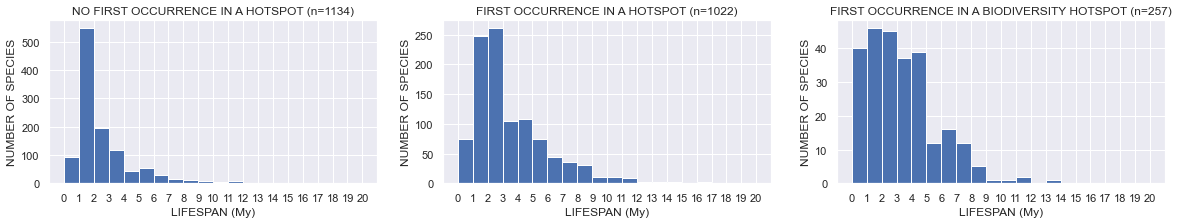

In [31]:
x = np.linspace(0,20,21)
fig, ax = plt.subplots(1,3,figsize=(20,3))
ax[0].hist(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no','LIFESPAN (My)'], bins=x)
ax[0].set_xlabel('LIFESPAN (My)')
ax[0].set_ylabel('NUMBER OF SPECIES')
ax[0].set_title('NO FIRST OCCURRENCE IN A HOTSPOT (n=' +\
        str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no','LIFESPAN (My)'].shape[0]) +')')
ax[0].set_xticks(x)

ax[1].hist(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes','LIFESPAN (My)'], bins=x)
ax[1].set_xlabel('LIFESPAN (My)')
ax[1].set_ylabel('NUMBER OF SPECIES')
ax[1].set_title('FIRST OCCURRENCE IN A HOTSPOT (n=' +\
    str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes','LIFESPAN (My)'].shape[0]) +')')
ax[1].set_xticks(x)

ax[2].hist(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes','LIFESPAN (My)'],\
           bins=x)
ax[2].set_xlabel('LIFESPAN (My)')
ax[2].set_ylabel('NUMBER OF SPECIES')
ax[2].set_title('FIRST OCCURRENCE IN A BIODIVERSITY HOTSPOT (n=' +\
        str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes',\
        'LIFESPAN (My)'].shape[0]) +')')
ax[2].set_xticks(x)

plt.show()

In [32]:
print('SINGLETONS REMOVED')
print()
print('Average lifespan of species that do not have a first occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average lifespan of species that have a first occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average lifespan of species that have a first occurrence in a biodiversity hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (time units)'].mean()) + ' time units.')
print()

print('Average lifespan of species that do not have a first occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (My)'].mean()) + ' million years.')
print('Average lifespan of species that have a first occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (My)'].mean()) + ' million years.')
print('Average lifespan of species that have a first occurrence in a biodiversity hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (My)'].mean()) + ' million years.')

SINGLETONS REMOVED

Average lifespan of species that do not have a first occurrence in a hotspot: 3.3724696356275303 time units.
Average lifespan of species that have a first occurrence in a hotspot: 3.607843137254902 time units.
Average lifespan of species that have a first occurrence in a biodiversity hotspot: 3.4381443298969074 time units.

Average lifespan of species that do not have a first occurrence in a hotspot: 4.112651821862344 million years.
Average lifespan of species that have a first occurrence in a hotspot: 4.974509803921578 million years.
Average lifespan of species that have a first occurrence in a biodiversity hotspot: 4.0762886597938115 million years.


WITHOUT SINGLETONS


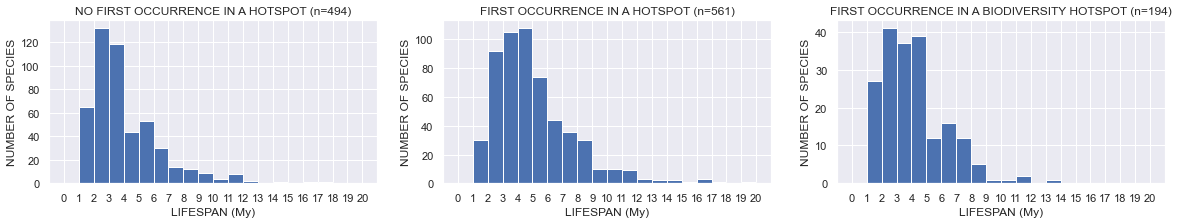

In [33]:
x = np.linspace(0,20,21)
print('WITHOUT SINGLETONS')
fig, ax = plt.subplots(1,3,figsize=(20,3))
ax[0].hist(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no') & \
                       (speciesLifespan['LIFESPAN (time units)']>1),'LIFESPAN (My)'], bins=x)
ax[0].set_xlabel('LIFESPAN (My)')
ax[0].set_ylabel('NUMBER OF SPECIES')
ax[0].set_title('NO FIRST OCCURRENCE IN A HOTSPOT (n=' +\
        str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no') & \
                       (speciesLifespan['LIFESPAN (time units)']>1),'LIFESPAN (My)'].shape[0]) +')')
ax[0].set_xticks(x)

ax[1].hist(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes') & \
                       (speciesLifespan['LIFESPAN (time units)']>1),'LIFESPAN (My)'], bins=x)
ax[1].set_xlabel('LIFESPAN (My)')
ax[1].set_ylabel('NUMBER OF SPECIES')
ax[1].set_title('FIRST OCCURRENCE IN A HOTSPOT (n=' +\
    str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes') & \
                       (speciesLifespan['LIFESPAN (time units)']>1),'LIFESPAN (My)'].shape[0]) +')')
ax[1].set_xticks(x)

ax[2].hist(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes') & \
                       (speciesLifespan['LIFESPAN (time units)']>1),'LIFESPAN (My)'],\
           bins=x)
ax[2].set_xlabel('LIFESPAN (My)')
ax[2].set_ylabel('NUMBER OF SPECIES')
ax[2].set_title('FIRST OCCURRENCE IN A BIODIVERSITY HOTSPOT (n=' +\
        str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes') & \
                       (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (My)'].shape[0]) +')')
ax[2].set_xticks(x)

plt.show()

In [34]:
print('speciesRangeHull:')
print('Average range of species that do not have a first occurrence in a hotspot: ' \
      + str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no'].mean(axis=1).mean()) + '.')
print('Average range of species that have a first occurrence in a hotspot: ' \
      + str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes'].mean(axis=1).mean()) + '.')
print('Average range of species that have a first occurrence in a biodiversity hotspot: ' \
      + str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes']\
            .mean(axis=1).mean()) + '.')

speciesRangeHull:
Average range of species that do not have a first occurrence in a hotspot: 8.524607812129627.
Average range of species that have a first occurrence in a hotspot: 15.233307233902298.
Average range of species that have a first occurrence in a biodiversity hotspot: 21.5348883344718.


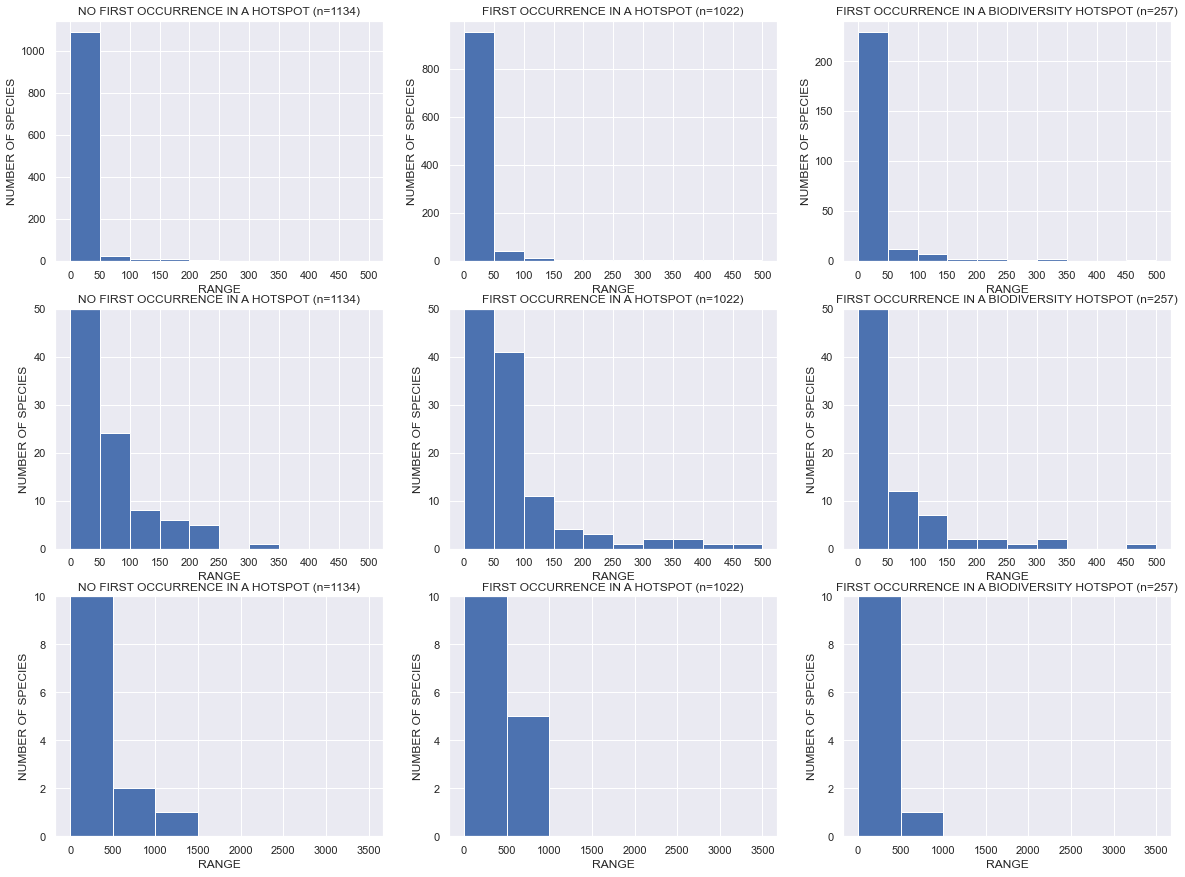

In [35]:
fig, ax = plt.subplots(3,3,figsize=(20,15))

x = np.linspace(0,500,11)

i = 0
j = 0
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no'].mean(axis=1), bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('NO FIRST OCCURRENCE IN A HOTSPOT (n=' +\
        str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no'].shape[0]) +')')
ax[i,j].set_xticks(x)

i = 0
j = 1
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes'].mean(axis=1), bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('FIRST OCCURRENCE IN A HOTSPOT (n=' +\
    str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes'].shape[0]) +')')
ax[i,j].set_xticks(x)

i = 0
j = 2
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes'].mean(axis=1),\
       bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('FIRST OCCURRENCE IN A BIODIVERSITY HOTSPOT (n=' +\
        str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes'].shape[0]) +')')
ax[i,j].set_xticks(x)

x = np.linspace(0,500,11)

i = 1
j = 0
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no'].mean(axis=1), bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('NO FIRST OCCURRENCE IN A HOTSPOT (n=' +\
        str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no'].shape[0]) +')')
ax[i,j].set_ylim([0,50])
ax[i,j].set_xticks(x)

i = 1
j = 1
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes'].mean(axis=1), bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('FIRST OCCURRENCE IN A HOTSPOT (n=' +\
    str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes'].shape[0]) +')')
ax[i,j].set_ylim([0,50])
ax[i,j].set_xticks(x)

i = 1
j = 2
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes'].mean(axis=1),\
       bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('FIRST OCCURRENCE IN A BIODIVERSITY HOTSPOT (n=' +\
        str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes'].shape[0]) +')')
ax[i,j].set_ylim([0,50])
ax[i,j].set_xticks(x)

x = np.linspace(0,3500,8)

i = 2
j = 0
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no'].mean(axis=1), bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('NO FIRST OCCURRENCE IN A HOTSPOT (n=' +\
        str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no'].shape[0]) +')')
ax[i,j].set_ylim([0,10])
ax[i,j].set_xticks(x)

i = 2
j = 1
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes'].mean(axis=1), bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('FIRST OCCURRENCE IN A HOTSPOT (n=' +\
    str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes'].shape[0]) +')')
ax[i,j].set_ylim([0,10])
ax[i,j].set_xticks(x)

i = 2
j = 2
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes'].mean(axis=1),\
       bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('FIRST OCCURRENCE IN A BIODIVERSITY HOTSPOT (n=' +\
        str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes'].shape[0]) +')')
ax[i,j].set_ylim([0,10])
ax[i,j].set_xticks(x)

plt.show()

In [36]:
print('speciesRangeBox')
print('Average range of species that do not have a first occurrence in a hotspot: ' \
      + str(speciesRangeBox.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no'].mean(axis=1).mean()) + '.')
print('Average range of species that have a first occurrence in a hotspot: ' \
      + str(speciesRangeBox.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes'].mean(axis=1).mean()) + '.')
print('Average range of species that have a first occurrence in a biodiversity hotspot: ' \
      + str(speciesRangeBox.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes'].mean(axis=1).mean()) \
      + '.')

speciesRangeBox
Average range of species that do not have a first occurrence in a hotspot: 26.78809499341628.
Average range of species that have a first occurrence in a hotspot: 46.58216131849043.
Average range of species that have a first occurrence in a biodiversity hotspot: 59.8199506560802.


In [37]:
print('speciesRangeHull: remove singletons')
print('Average range of species that do not have a first occurrence in a hotspot: ' \
      + str(speciesRangeHull.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no') & \
                                     (speciesLifespan['LIFESPAN (time units)']>1)].mean(axis=1).mean()) + '.')
print('Average range of species that have a first occurrence in a hotspot: ' \
      + str(speciesRangeHull.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes') & \
                                     (speciesLifespan['LIFESPAN (time units)']>1)].mean(axis=1).mean()) + '.')
print('Average range of species that have a first occurrence in a biodiversity hotspot: ' \
      + str(speciesRangeHull.loc[(speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes') & \
                                     (speciesLifespan['LIFESPAN (time units)']>1)].mean(axis=1).mean()) + '.')

speciesRangeHull: remove singletons
Average range of species that do not have a first occurrence in a hotspot: 16.727536129207305.
Average range of species that have a first occurrence in a hotspot: 25.088648712565448.
Average range of species that have a first occurrence in a biodiversity hotspot: 28.144216037641826.


## LAST OCCURRENCES

In [38]:
# ADD INFO FOR EACH SPECIES ON THEIR OCCURRENCES IN HOTSPOTS
#for timeUnit in timeUnits[1:-1]:
for timeUnit in timeUnits[2:-2]:
    # determine hotspots and hot spot species
    hotspots = localityFeatures[(localityFeatures['TIMEUNIT']==timeUnit) & \
                                (localityFeatures['SIGNIFICANCE LAST']<0.05)]
    hotspot_species = set(df.loc[df['LIDNUM'].isin(hotspots.index),'ID'].unique())
    hotspot_species = hotspot_species.intersection(allowed_species)
    biodiversity_hotspots = localityFeatures[(localityFeatures['TIMEUNIT']==timeUnit) & \
                     (localityFeatures['SIGNIFICANCE LAST']<0.05) & (localityFeatures['SIGNIFICANCE FIRST']>0.95)]
    biodiversity_hotspot_species = set(df.loc[df['LIDNUM'].isin(biodiversity_hotspots.index),'ID'].unique())
    biodiversity_hotspot_species = biodiversity_hotspot_species.intersection(allowed_species)
    
    # determine info on last occurrences
    last_occurring_species = speciesLastOccurrence.loc[speciesLastOccurrence[timeUnit]==1].index
    species_with_last_occurrence_in_hotspot = hotspot_species.intersection(last_occurring_species)
    species_with_last_occurrence_in_biodiversity_hotspot = \
                biodiversity_hotspot_species.intersection(last_occurring_species)
    
    # import info to speciesLifespan dataframe
    speciesLifespan.loc[species_with_last_occurrence_in_hotspot,'LAST OCCURRENCE IN HOTSPOT'] = 'yes'
    speciesLifespan.loc[species_with_last_occurrence_in_biodiversity_hotspot,\
                        'LAST OCCURRENCE IN BIODIVERSITY HOTSPOT'] = 'yes'    

speciesLifespan.loc[speciesLifespan['LAST OCCURRENCE IN HOTSPOT'].isnull(), 'LAST OCCURRENCE IN HOTSPOT'] = 'no'
speciesLifespan.loc[speciesLifespan['LAST OCCURRENCE IN BIODIVERSITY HOTSPOT'].isnull(), \
                    'LAST OCCURRENCE IN BIODIVERSITY HOTSPOT'] = 'no'

speciesLifespan.head()

,GENUS,SPECIES,LIFESPAN (time units),LIFESPAN (My),FIRST OCCURRENCE IN HOTSPOT,ANY OCCURRENCE IN HOTSPOT,FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT,ANY OCCURRENCE IN BIODIVERSITY HOTSPOT,OLD OCCURRENCE (ONLY) IN HOTSPOT,OLD OCCURRENCE (ONLY) IN BIODIVERSITY HOTSPOT,LAST OCCURRENCE IN HOTSPOT,LAST OCCURRENCE IN BIODIVERSITY HOTSPOT
17,Heteroxerus,rubricati,7,11.8,yes,yes,no,yes,no,yes,yes,no
39,Microdyromys,koenigswaldi,7,11.8,yes,yes,no,yes,no,yes,no,no
86,Pseudodryomys,ibericus,5,8.85,yes,yes,no,yes,no,yes,no,no
104,Styriofelis,turnauensis,8,12.8,yes,yes,no,yes,no,yes,no,no
109,Lagopsis,penai,5,8.85,yes,yes,no,yes,no,yes,no,no


In [39]:
print('Average lifespan of species that do not have a last occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='no',\
        'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average lifespan of species that have a last occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='yes',\
        'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average lifespan of species that have a last occurrence in a biodiversity hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['LAST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes',\
        'LIFESPAN (time units)'].mean()) + ' time units.')
print()

print('Average lifespan of species that do not have a last occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='no',\
        'LIFESPAN (My)'].mean()) + ' million years.')
print('Average lifespan of species that have a last occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='yes',\
        'LIFESPAN (My)'].mean()) + ' million years.')
print('Average lifespan of species that have a last occurrence in a biodiversity hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['LAST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes',\
        'LIFESPAN (My)'].mean()) + ' million years.')

Average lifespan of species that do not have a last occurrence in a hotspot: 2.1914734480179505 time units.
Average lifespan of species that have a last occurrence in a hotspot: 2.272283272283272 time units.
Average lifespan of species that have a last occurrence in a biodiversity hotspot: 2.8956834532374103 time units.

Average lifespan of species that do not have a last occurrence in a hotspot: 2.8559087509349586 million years.
Average lifespan of species that have a last occurrence in a hotspot: 3.1239316239316355 million years.
Average lifespan of species that have a last occurrence in a biodiversity hotspot: 3.6749999999999905 million years.


In [40]:
print('SINGLETONS REMOVED')
print()
print('Average lifespan of species that do not have a last occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='no') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average lifespan of species that have a last occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='yes') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average lifespan of species that have a last occurrence in a biodiversity hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['LAST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (time units)'].mean()) + ' time units.')
print()

print('Average lifespan of species that do not have a last occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='no') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (My)'].mean()) + ' million years.')
print('Average lifespan of species that have a last occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='yes') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (My)'].mean()) + ' million years.')
print('Average lifespan of species that have a last occurrence in a biodiversity hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['LAST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (My)'].mean()) + ' million years.')

SINGLETONS REMOVED

Average lifespan of species that do not have a last occurrence in a hotspot: 3.4432515337423313 time units.
Average lifespan of species that have a last occurrence in a hotspot: 3.5856079404466503 time units.
Average lifespan of species that have a last occurrence in a biodiversity hotspot: 3.716494845360825 time units.

Average lifespan of species that do not have a last occurrence in a hotspot: 4.54647239263805 million years.
Average lifespan of species that have a last occurrence in a hotspot: 4.610545905707196 million years.
Average lifespan of species that have a last occurrence in a biodiversity hotspot: 4.651030927835048 million years.


In [41]:
print('speciesRangeHull:')
print('Average range of species that do not have a last occurrence in a hotspot: ' \
      + str(speciesRangeHull.loc[speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='no'].mean(axis=1).mean()) + '.')
print('Average range of species that have a last occurrence in a hotspot: ' \
      + str(speciesRangeHull.loc[speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='yes'].mean(axis=1).mean()) + '.')
print('Average range of species that have a last occurrence in a biodiversity hotspot: ' \
      + str(speciesRangeHull.loc[speciesLifespan['LAST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes']\
            .mean(axis=1).mean()) + '.')

speciesRangeHull:
Average range of species that do not have a last occurrence in a hotspot: 7.6104625568942845.
Average range of species that have a last occurrence in a hotspot: 18.388469857674597.
Average range of species that have a last occurrence in a biodiversity hotspot: 19.247366026893168.


In [42]:
print('speciesRangeHull: remove singletons')
print('Average range of species that do not have a last occurrence in a hotspot: ' \
      + str(speciesRangeHull.loc[(speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='no') & \
                                     (speciesLifespan['LIFESPAN (time units)']>1)].mean(axis=1).mean()) + '.')
print('Average range of species that have a last occurrence in a hotspot: ' \
      + str(speciesRangeHull.loc[(speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='yes') & \
                                     (speciesLifespan['LIFESPAN (time units)']>1)].mean(axis=1).mean()) + '.')
print('Average range of species that have a last occurrence in a biodiversity hotspot: ' \
      + str(speciesRangeHull.loc[(speciesLifespan['LAST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes') & \
                                     (speciesLifespan['LIFESPAN (time units)']>1)].mean(axis=1).mean()) + '.')

speciesRangeHull: remove singletons
Average range of species that do not have a last occurrence in a hotspot: 14.12746665178926.
Average range of species that have a last occurrence in a hotspot: 32.57326679556085.
Average range of species that have a last occurrence in a biodiversity hotspot: 25.242367484099578.
